In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
raw = pd.read_csv('top500histories', index_col=0)

In [3]:
raw_sorted = raw.sort_values('round')

In [4]:
df = raw_sorted[['assists', 'bonus', 'bps', 'clean_sheets', 'goals_scored', 
                 'minutes', 'round', 'saves', 'selected', 'total_points',
                 'team_a_score', 'team_h_score', 'transfers_in',
                 'transfers_out', 'sum_points', 'sum_minutes', 'team_a_conceded_rank',
                 'points_per_90', 'next_week_points']]
df.head()

,assists,bonus,bps,clean_sheets,goals_scored,minutes,round,saves,selected,total_points,team_a_score,team_h_score,transfers_in,transfers_out,sum_points,sum_minutes,team_a_conceded_rank,points_per_90,next_week_points
0,0,0,5,1,0,90,1,0,586801,2,0,0,0,0,2,90,1,2.000000,2
1295,0,0,5,1,0,68,1,0,104923,2,0,0,0,0,2,68,1,2.647059,2
7180,0,0,6,0,0,45,1,0,68985,1,0,0,0,0,1,45,1,2.000000,2
7159,0,0,5,1,0,90,1,0,8467,2,0,0,0,0,2,90,1,2.000000,2
1316,0,0,12,0,0,90,1,0,20821,2,1,1,0,0,2,90,10,2.000000,6


In [5]:
X_train = df.drop('next_week_points', axis=1).iloc[:7000]

X_test = df.drop('next_week_points', axis=1).iloc[7000:]

y_train = df['next_week_points'][:7000]

y_test = df['next_week_points'][7000:]


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4)

In [11]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
y_pred = rf.predict(X_test)

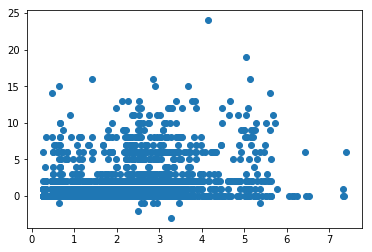

In [13]:
plt.scatter(y_pred, y_test)

In [15]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_train, rf.predict(X_train))

0.2607632787180775